# **Sales Report Analysis**

## Business Overview

The sales department plays a crucial role in driving business growth and sustainability. Analyzing sales data provides valuable insights into product demand, regional sales trends, and category performance in terms of the products. It also helps identify top-performing sales representatives who contribute significantly to revenue generation.

These insights can be leveraged to:

* Recognize and reward high-performing sales representatives.

* Optimize procurement and supply chain decisions based on demand trends.

* Strategically allocate resources to maximize sales opportunities and profitability.

## Business Problem

Stakeholders at Jenny’s Enterprise seek insights into sales performance to optimize business strategies. They are particularly interested in identifying the best-selling products, preferred sales channels, and underperforming regions to enhance sales and improve customer satisfaction.

To achieve this, they have tasked me with analyzing the sales dataset to answer the following key questions:

* Which are the top 10 fast-moving products?

* Which sales channel do customers prefer, and how can the company optimize it?

* Which region has the lowest sales, and what strategies can improve performance there?

* What is the overall customer satisfaction rate?

## Data Understanding

The Dataset was downloaded from kaggle under the link: https://www.kaggle.com/datasets/vinothkannaece/sales-dataset?resource=download. It contains 1000 rows and 14 columns and is in a csv format. We will proceed to inspect and analyze the data to see whether we have any missing values, outliers and duplicate records.

###  Data Loading & Inspection

#### Import Relevant Libraries

In [216]:
# Data analysis tools
import pandas as pd
import numpy as np
# Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [217]:
# Load the dataset 
sales_df = pd.read_csv("sales_data.csv")
# View a random sample of 7 records from the df
sales_df.sample(7)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
403,1090,2023-06-03,Eve,North,2132.80,41,Furniture,2055.49,2441.46,New,0.24,Credit Card,Online,North-Eve
735,1014,2023-06-07,Alice,North,408.38,3,Electronics,2468.29,2723.13,Returning,0.08,Cash,Retail,North-Alice
679,1071,2023-11-24,Alice,West,8049.72,12,Food,4317.95,4636.59,New,0.18,Credit Card,Retail,West-Alice
819,1037,2023-09-19,Alice,South,4606.20,17,Electronics,1308.58,1575.59,New,0.30,Cash,Online,South-Alice
385,1087,2023-02-28,Alice,West,7534.30,15,Furniture,4074.66,4261.11,Returning,0.05,Credit Card,Retail,West-Alice
398,1086,2023-07-20,Bob,North,7075.09,17,Food,1057.27,1366.62,New,0.21,Credit Card,Retail,North-Bob
878,1079,2023-10-28,Bob,West,1558.03,38,Furniture,1127.76,1265.66,Returning,0.26,Bank Transfer,Retail,West-Bob


In [218]:
# Confirm the column names from the column attribute
sales_df.columns


Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [219]:
# Check the shape of the dataframe attribute
sales_df.shape
# Our df has 1000 rows and 14 columns in total

(1000, 14)

In [220]:
# Inspect the information of the df
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


**Summary Findings**

1. Our dataset comprises of 4 floats, 2 integers and 8 objects.

2. We do not have any null values as all the counts sum to 1000

In [221]:
# Confirm the descriptive columns
sales_df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


**Summary Findings**

1. Based on the mean, quartile and max statistical data we do not detect any outliers however we shall proceed to confirm this assumption during data cleaning.



#### Data Cleaning

In [222]:
# Check for duplicate values
sales_df.duplicated().sum()

0

In [223]:
# Check for missing values
sales_df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

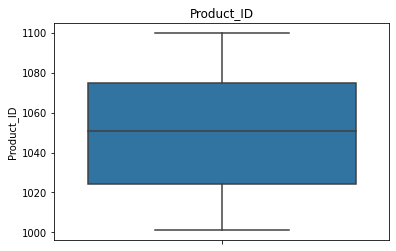

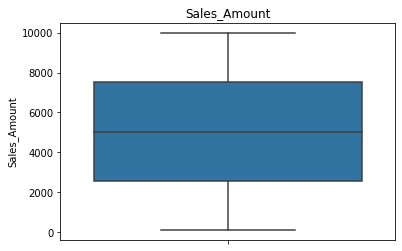

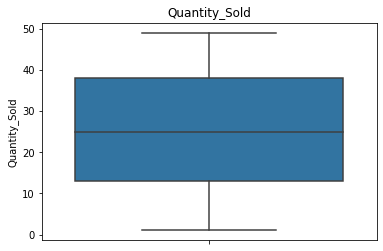

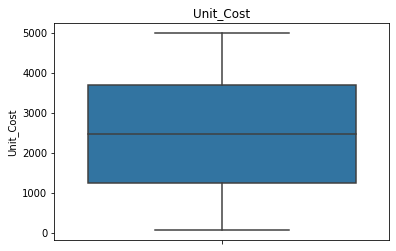

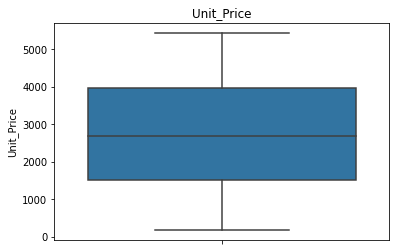

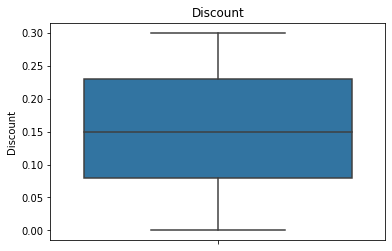

In [224]:
#  Check for Outliers from the statistical columns
#  Visualize the same
numericals = sales_df.select_dtypes(include=['float64', 'int64'])

for col in numericals.columns:
    sns.boxplot(y=numericals[col])
    plt.title(col)
    plt.show();

**Summary Findings**

1. As mentioned earlier from our observations, we have confirmed that we do not have any outliers.

#### Univariate Analysis


Product_id Unique Values: 100
Top 10 listed Products:
Product_ID
1090    20
1062    19
1092    19
1099    18
1033    18
1001    16
1086    15
1058    15
1017    15
1089    14
Name: count, dtype: int64

Bottom 10 listed Products:
Product_ID
1079    6
1010    6
1091    5
1043    5
1068    5
1040    5
1011    4
1041    4
1083    4
1031    3
Name: count, dtype: int64



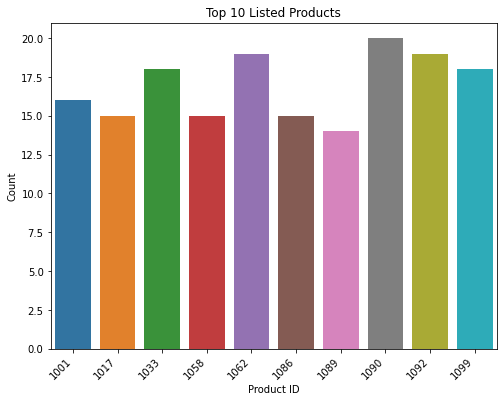

In [225]:
# View the unique values of the product id columns
# View the item value count and the top 10 and bottom 10
# Visualize the value counts results
print(f"Product_id Unique Values: {sales_df['Product_ID'].nunique()}")

product_id = sales_df["Product_ID"].value_counts()

# Display top and bottom 10 products
print(f"Top 10 listed Products:\n{product_id.head(10)}\n")
print(f"Bottom 10 listed Products:\n{product_id.tail(10)}\n")  

# Plot top 10 listed products
fig, ax = plt.subplots(figsize=(8, 6))
top_10_listed_products = product_id.head(10)
sns.barplot(x=top_10_listed_products.index, y=top_10_listed_products.values)

# Visualization
plt.xticks(rotation=45, ha="right")  
plt.xlabel("Product ID")
plt.ylabel("Count")
plt.title("Top 10 Listed Products")
plt.show()

**Summary Findings**

1. Product id 1090 has the highest records of 20 rows followed by 1062 and 1092 at 19 and 1099 and 1033 at 18 respectively indicating that they were the most sold products.

2. The least sold products are 1040, 1011, 1041, 1083 and 1031 respectively in that order.

Sales_Rep
David      222
Eve        209
Bob        208
Alice      192
Charlie    169
Name: count, dtype: int64


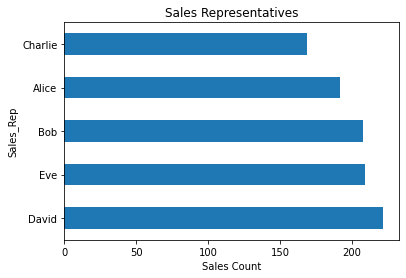

In [226]:
# Sales Rep
sales_rep = sales_df['Sales_Rep'].value_counts()
print(sales_rep)
sales_rep.plot(kind='barh')
plt.xlabel("Sales Count")
plt.title("Sales Representatives");

**Summary Findings**

1. We have 5 sales reps: David, Eve and Bob had the highest sales respectively.

Region
North    267
East     263
West     244
South    226
Name: count, dtype: int64


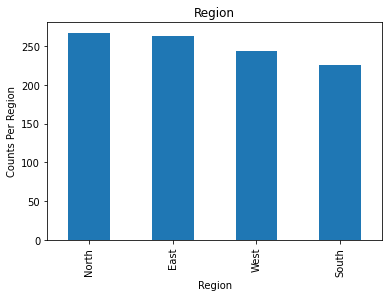

In [227]:
# Region Analysis
region = sales_df['Region'].value_counts()
print(region)
region.plot(kind='bar')
plt.ylabel("Counts Per Region")
plt.title("Region");

**Summary Findings**

1. North Region has the highest sales followed by East region. South region records the lowest sales

Product_Category
Clothing       268
Furniture      260
Electronics    246
Food           226
Name: count, dtype: int64


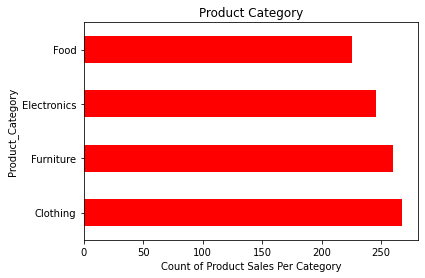

In [228]:
# Check the max, min, mean and std 
product_cat = sales_df.Product_Category.value_counts()
print(product_cat)
product_cat.plot(kind = 'barh', color = "red")
plt.xlabel("Count of Product Sales Per Category")
plt.title("Product Category");

**Summary Findings**

1. The most sold product in categorization was the Clothing and the least sold products Food.

Customer_Type
New          504
Returning    496
Name: count, dtype: int64


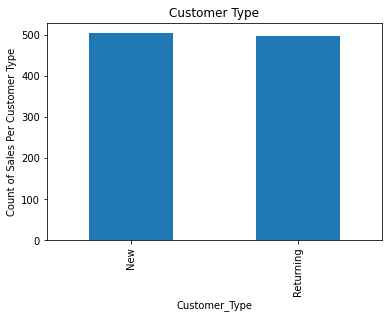

In [229]:
customer_type = sales_df['Customer_Type'].value_counts()
print(customer_type)
customer_type.plot(kind='bar')
plt.ylabel("Count of Sales Per Customer Type")
plt.title("Customer Type");

**Findings**

1. Most of the sales were made from new customers. We also have a good number of returning customers. This is a possible indication of service or product satisfaction.

Payment_Method
Credit Card      345
Bank Transfer    342
Cash             313
Name: count, dtype: int64


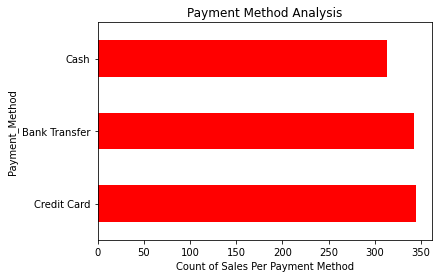

In [230]:
payment_method = sales_df['Payment_Method'].value_counts()
print(payment_method)
payment_method.plot(kind='barh', color='red')
plt.title("Payment Method Analysis")
plt.xlabel("Count of Sales Per Payment Method");

**Findings**

1. Most of the products were paid using the Credit cards followed by Bank transfer and Cash.

Sales_Channel
Retail    512
Online    488
Name: count, dtype: int64


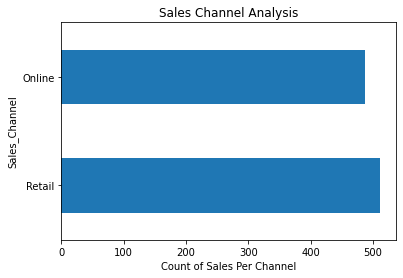

In [231]:
sales_channel = sales_df['Sales_Channel'].value_counts()
print(sales_channel)
sales_channel.plot(kind='barh')
plt.title("Sales Channel Analysis")
plt.xlabel("Count of Sales Per Channel");

**Findings**

1. The sales channel through which most of the sales was made was through the retail channel then followed closely by online purchases.

Region_and_Sales_Rep
North-Eve        64
East-Bob         60
East-David       59
South-David      56
North-David      56
North-Charlie    55
East-Eve         55
West-Bob         54
East-Alice       52
West-David       51
South-Bob        50
North-Alice      48
West-Alice       47
West-Eve         47
West-Charlie     45
South-Alice      45
North-Bob        44
South-Eve        43
East-Charlie     37
South-Charlie    32
Name: count, dtype: int64


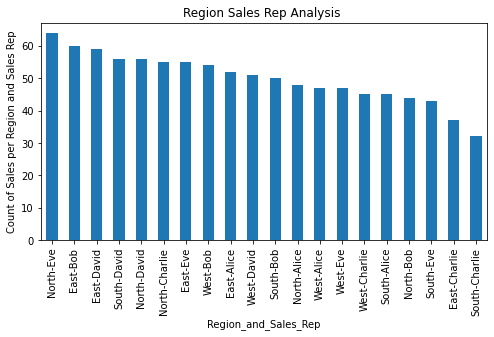

In [232]:
region_sales_rep = sales_df['Region_and_Sales_Rep'].value_counts()
print(region_sales_rep)
region_sales_rep.plot(kind='bar', figsize=(8, 4))
plt.title("Region Sales Rep Analysis ")
plt.ylabel("Count of Sales per Region and Sales Rep");

**Findings**

1. Eve sold most products in the North Region, Bob in the East region, David in the South region and Bob again in the West as well.

#### Multivariate Analysis

**Findings**

1. We observe that product 1099 had the highest sales amount among the top 10 most selling products.

Region
East     1259792.93
North    1369612.51
South    1154250.86
West     1235608.93
Name: Sales_Amount, dtype: float64


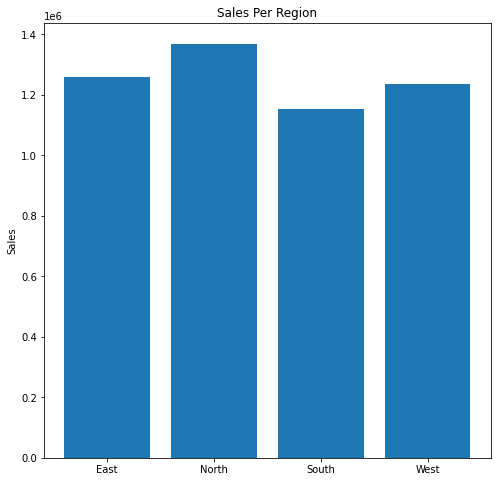

In [233]:
sales_per_region = sales_df.groupby('Region')['Sales_Amount'].sum()
print(sales_per_region)
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(sales_per_region.index, sales_per_region.values)
ax.set_ylabel("Sales")
ax.set_title("Sales Per Region")
plt.show();

**Findings**

1. The North Region had the highest sales amount while the least sales amount was from the South.

Product_ID
1031     64
1043     65
1011     75
1065    105
1083    125
1098    126
1022    127
1068    130
1070    131
1007    143
Name: Quantity_Sold, dtype: int64


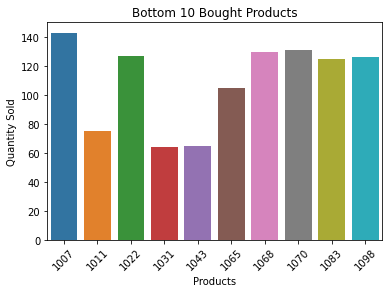

In [234]:
quantity_sold = sales_df.groupby('Product_ID')['Quantity_Sold'].sum()
bottom_10_products_sold = quantity_sold.sort_values(ascending=True).head(10)
print(bottom_10_products_sold)
sns.barplot(x=bottom_10_products_sold.index, y=bottom_10_products_sold.values)
plt.title("Bottom 10 Bought Products")  # Set the title properly
plt.xlabel("Products")  # Optional: Set x-axis label
plt.ylabel("Quantity Sold")  # Optional: Set y-axis label
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.show()  # Display the plot

In [235]:
sales_df.groupby("Product_Category")[['Unit_Cost', 'Unit_Price', 'Quantity_Sold']].mean()

,Unit_Cost,Unit_Price,Quantity_Sold
Product_Category,,,
Clothing,2470.587313,2721.256381,25.828358
Electronics,2545.330081,2795.207195,24.780488
Food,2407.998938,2657.811726,24.814159
Furniture,2472.416115,2734.065346,25.880769


**Findings**

1. Electronics is the most pricy product and consequently has the lowest number of average items sold.

2. Furniture has the highest average quantities sold closely followed by Clothing. Meaning that if you are a retailer this two products are fast moving and one would consider listing this.

3. Food is the least priced product.

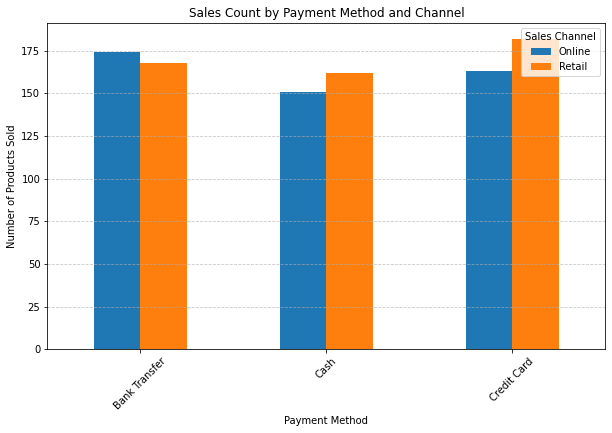

In [236]:
# Group by Payment_Method and Sales_Channel and count Product_ID
channel_payment_method = sales_df.groupby(['Payment_Method', 'Sales_Channel'])['Product_ID'].count()

# Convert MultiIndex Series into a DataFrame for better visualization
channel_payment_method = channel_payment_method.unstack()

# Plot the data
channel_payment_method.plot(kind='bar', figsize=(10, 6))  
plt.title("Sales Count by Payment Method and Channel")
plt.xlabel("Payment Method")
plt.ylabel("Number of Products Sold")
plt.xticks(rotation=45)  
plt.legend(title="Sales Channel")  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Findings**

1. Most of the Credit Card Users prefer the retail sale channel similar to the cash payment option which is the general assumption.

2. The customers that pay via Bank Transfers prefer the online platform.

Customer_Type  New  Returning
Sales_Channel                
Online         254        234
Retail         250        262


<Figure size 720x576 with 0 Axes>

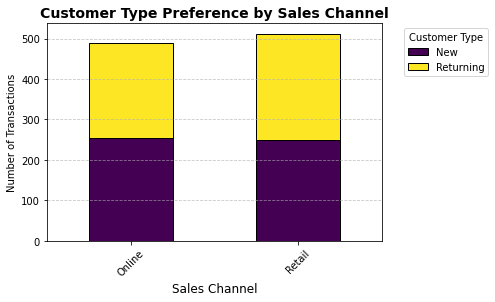

In [237]:
sales_channel_counts = sales_df.groupby(['Sales_Channel', 'Customer_Type'])['Customer_Type'].count().unstack()
print(sales_channel_counts)

# Plotting the grouped bar chart
plt.figure(figsize=(10, 8))
sales_channel_counts.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')

# Formatting the chart
plt.title('Customer Type Preference by Sales Channel', fontsize=14, fontweight='bold')
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show();

**Findings**

* Most of the returning customers prefered retail shopping than the online shopping.

Customer_Type     New  Returning
Product_Category                
Clothing          143        125
Electronics       136        110
Food              111        115
Furniture         114        146


<Figure size 720x576 with 0 Axes>

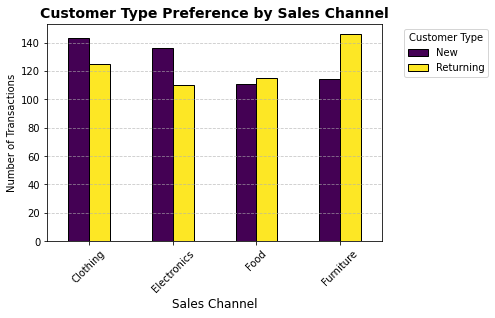

In [238]:
sales_channel_counts = sales_df.groupby(['Product_Category', 'Customer_Type'])['Customer_Type'].count().unstack()
print(sales_channel_counts)

# Plotting the grouped bar chart
plt.figure(figsize=(10, 8))
sales_channel_counts.plot(kind='bar', stacked=False, colormap='viridis', edgecolor='black')

# Formatting the chart
plt.title('Customer Type Preference by Sales Channel', fontsize=14, fontweight='bold')
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show();

## Data Limitations

* A short description of the product besides the product ID and the category would have enabled us to do a deep dive on the sales analysis.

* Historical sales data per representative would have allowed for trend analysis and performance evaluation over time.

## Conclusions & Recommendations

* The top 10 fast moving products are as indicated: 1090, 1062, 1092, 1099, 1033, 1001, 1086, 1058, 1017 and 1089 respectively. This implies that the company ought to ensure this products are well stacked to ensure continuous sales. The least purchased item was 1031. Maybe a discount on the product or better marketing strategies should be implemented to promote its movement. Among the top 10 products product ID 1099 made the highest sales.

* Most customers prefer retail than online shopping. We therefore should ensure that we have enough employees to attend to the customers at the physical store. Most of the retail buyers prefered using the method of payment as Credit cards. Most of the returning customers prefered retail shopping. Further investigations should be done to access why most customers prefer retail to online shopping. Possible reasons: Delayed response, proximity or just the personal interactions with the customers at the shops as we note most of them are returning customers signifying customer satisfaction. 

* From the analysis, we note the lowest selling region was South region while the region with the most sales was the North. More marketing should be done in the South region to increase the number of sales.

* Most of the returning customers purchase the furnitures. Most of the new customers purchase clothings. There is not a significant difference between the new and the returning customers. This possibly suggests that the customers are generally satisfied with the service and products and through referrals, the company gets to have the new customers as well. More focus should be put in to ensure customer satisfaction even after the sale is made as well as loyalty programs.